<a href="https://colab.research.google.com/github/Battula-Shilpa/-Machine-Learning/blob/main/4_Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

In [ ]:
#Import Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")

In [ ]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [ ]:
for col in col_names:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
df.shape

(1727, 7)

In [ ]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

# Preprocessing


In [ ]:
df.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

#df[['buying','maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']] = oe.fit_transform(df[['buying','maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']])

df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

# train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred1 = rf.predict(X_test)
pred1

array([2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 1.,
       2., 2., 1., 2., 2., 3., 0., 0., 2., 2., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 3., 2., 2.,
       0., 2., 3., 0., 2., 2., 2., 0., 2., 2., 2., 2., 3., 2., 2., 0., 2.,
       0., 2., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 1., 0., 2., 2., 0., 2., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 0., 2., 0., 2., 2., 0., 2., 0., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 3., 2., 3., 0., 0., 2., 3.,
       0., 2., 3., 2., 0., 0., 3., 2., 0., 2., 0., 2., 2., 0., 1., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3.,
       2., 0., 2., 0., 2., 3., 2., 2., 0., 2., 2., 2., 2., 2., 2., 3., 3.,
       2., 2., 0., 3., 0.

In [ ]:
#Evalute
from sklearn.metrics import accuracy_score
print('Accuracy :',accuracy_score(y_test,pred1))

Accuracy : 0.9710982658959537


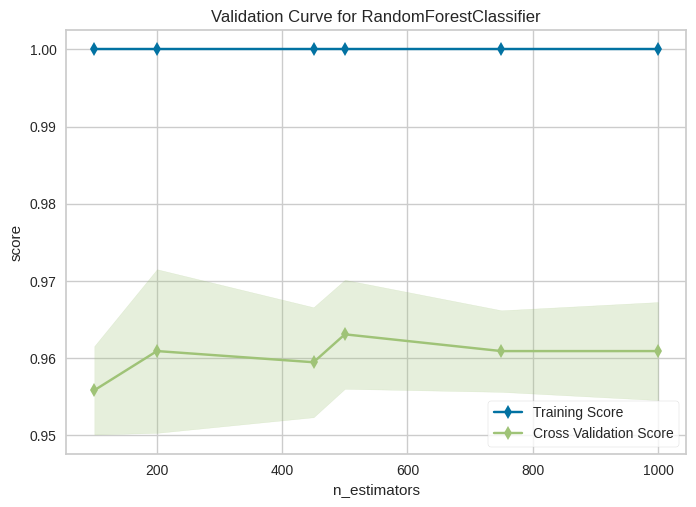

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve
#from sklearn.model_selection import validation_curve

num_est = [100,200,450,500,750,1000]

print(validation_curve(
    RandomForestClassifier(),
    X=X_train,
    y=y_train,
    param_name='n_estimators',  # Corrected param_name
    param_range=num_est,        # Ensure num_est is a list or array
    scoring='accuracy',
    cv=3
))

#print("Training Scores:\n", train_scores)
#print("Validation Scores:\n", test_scores)

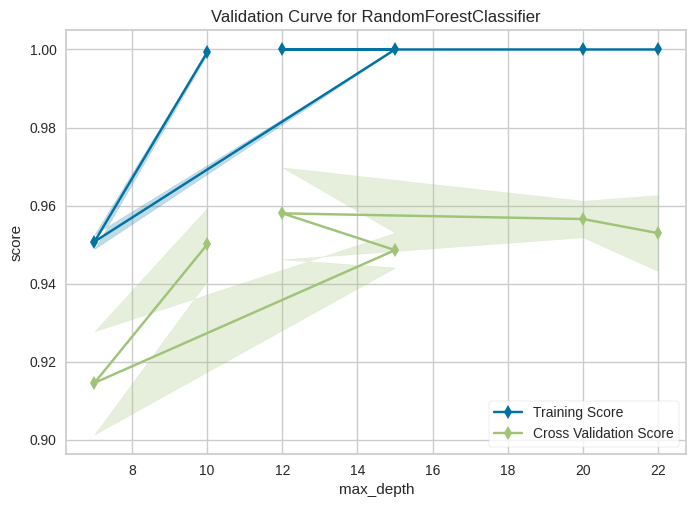

In [ ]:
# Define values for min_samples_split (or depth if tuning max_depth)
param_vals = [10,7,15,12,20,22]  # Change based on the hyperparameter

# Run validation_curve
vc_result = validation_curve(
    RandomForestClassifier(),
    X=X_train,
    y=y_train,
    param_name='max_depth',  # Change to 'max_depth' if tuning depth
    param_range=param_vals,
    scoring='accuracy',
    cv=3
)


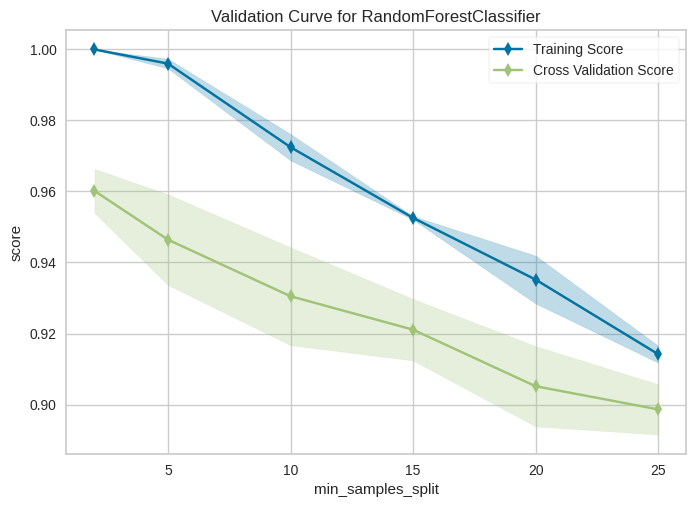

In [ ]:
# Define values for min_samples_split
min_samples_vals = [2, 5, 10, 15, 20, 25]

# Get the ValidationCurve object
vc_result = validation_curve(
    RandomForestClassifier(),
    X=X_train,
    y=y_train,
    param_name='min_samples_split',  # Correct parameter name
    param_range=min_samples_vals,
    scoring='accuracy',
    cv=3
)

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 1000,min_samples_split=3, max_depth=15,random_state=0)
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=1000,
                       random_state=0)

In [ ]:
pred2 = rf2.predict(X_test)
print('Accuracy 2 :',accuracy_score(y_test,pred2))

Accuracy 2 : 0.9710982658959537


In [ ]:
feature_scores = pd.Series(rf2.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_scores)

safety      0.288136
persons     0.233230
buying      0.185180
maint       0.149029
lug_boot    0.082086
doors       0.062340
dtype: float64


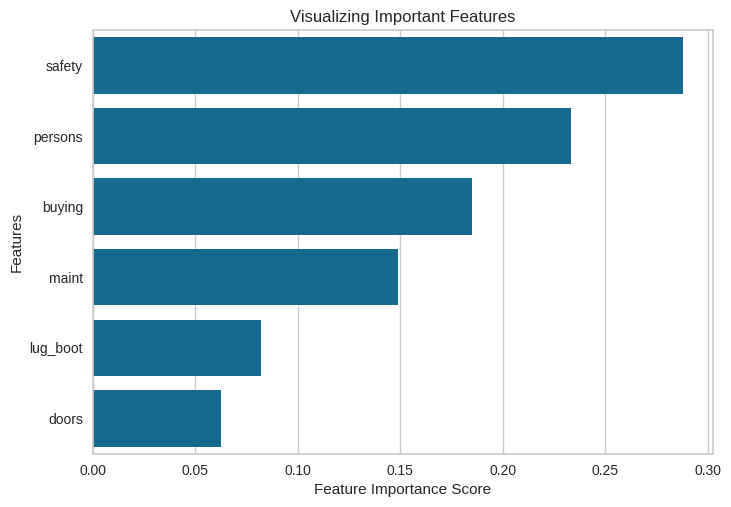

In [ ]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
rf3 = RandomForestClassifier()

Xn = df.drop(['doors','lug_boot','maint'],axis =1)
yn = df['class']

X_trainn,X_testn,y_trainn,y_testn = train_test_split(Xn,yn,test_size=0.2,random_state=0)

rf3 = rf3.fit(X_trainn,y_trainn)

pred3 = rf3.predict(X_testn)

print('Accuracy 3 :',accuracy_score(y_testn,pred3))

Accuracy 3 : 1.0
